### This script contains the following:
#### 1. Import libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis 
#### 4. Regression analysis

### 1. Import libraries and data

In [39]:
# Import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
#Import Data

path =r'C:\Users\north\10-2024 Exploring Chocolate Bar Quality\02 Data\Prepared Data'
df_cacao=pd.read_csv(os.path.join(path,'cleaned_cacao_data_with_mapped_regions.csv'))

### 2. Data cleaning

In [12]:
df_cacao.columns

Index(['Company', 'Bean Origin', 'Reference', 'Review Date', 'Cocoa Percent',
       'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin',
       'Region_Final'],
      dtype='object')

In [14]:
df_cacao.shape

(1791, 10)

In [22]:
df_cacao.head()

,Company,Bean Origin,Reference,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Region_Final
0,A. Morin,Agua Grande,1876.0,2016,0.63,France,3.75,Unknown,São Tomé and Principe,São Tomé and Principe
1,A. Morin,Kpime,1676.0,2015,0.70,France,2.75,Unknown,Togo,Togo
2,A. Morin,Atsane,1676.0,2015,0.70,France,3.00,Unknown,Togo,Togo
3,A. Morin,Akata,1680.0,2015,0.70,France,3.50,Unknown,Togo,Togo
4,A. Morin,Quilla,1704.0,2015,0.70,France,3.50,Unknown,Peru,Peru


##### Missing values

In [25]:
# Check for missing values

df_cacao.isnull().sum()

# No missing values to handle

Company              0
Bean Origin          0
Reference            0
Review Date          0
Cocoa Percent        0
Company Location     0
Rating               0
Bean Type            0
Broad Bean Origin    0
Region_Final         0
dtype: int64

##### Duplicates check

In [28]:
dups=df_cacao.duplicated()

In [34]:
dups.shape # no dups

(1791,)

##### Extreme values checks

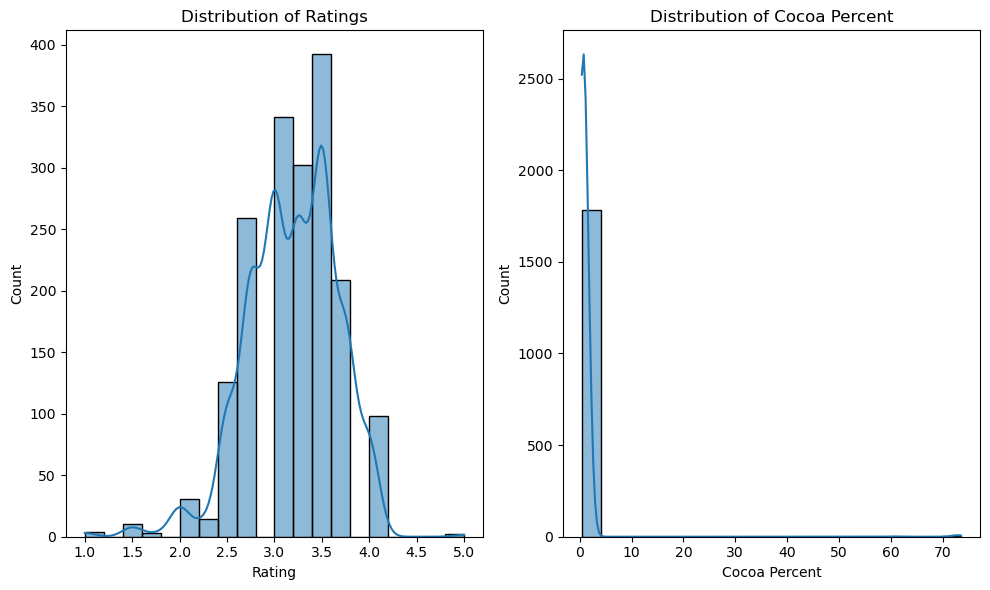

In [43]:
# Plotting the distribution of 'Rating'
plt.figure(figsize=(10, 6))

# Plot for Ratings
plt.subplot(1, 2, 1)
sns.histplot(df_cacao['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')

# Plot for Cocoa Percent
plt.subplot(1, 2, 2)
sns.histplot(df_cacao['Cocoa Percent'], bins=20, kde=True)
plt.title('Distribution of Cocoa Percent')

plt.tight_layout()
plt.show()


In [45]:
# Check for extreme values in Rating (above 5)
extreme_ratings = df_cacao[df_cacao['Rating'] > 5]
print("Extreme Rating Values:")
print(extreme_ratings)

# Check for extreme values in Cocoa Percent (e.g., above 100)
extreme_cocoa_percent = df_cacao[df_cacao['Cocoa Percent'] > 100]
print("Extreme Cocoa Percent Values:")
print(extreme_cocoa_percent)

Extreme Rating Values:
Empty DataFrame
Columns: [Company, Bean Origin, Reference, Review Date, Cocoa Percent, Company Location, Rating, Bean Type, Broad Bean Origin, Region_Final]
Index: []
Extreme Cocoa Percent Values:
Empty DataFrame
Columns: [Company, Bean Origin, Reference, Review Date, Cocoa Percent, Company Location, Rating, Bean Type, Broad Bean Origin, Region_Final]
Index: []


**No extreme Ratings / No extreme Cocoa Percentages found.** --> See also Script 6.3

### 3. Data prep for regression analysis 

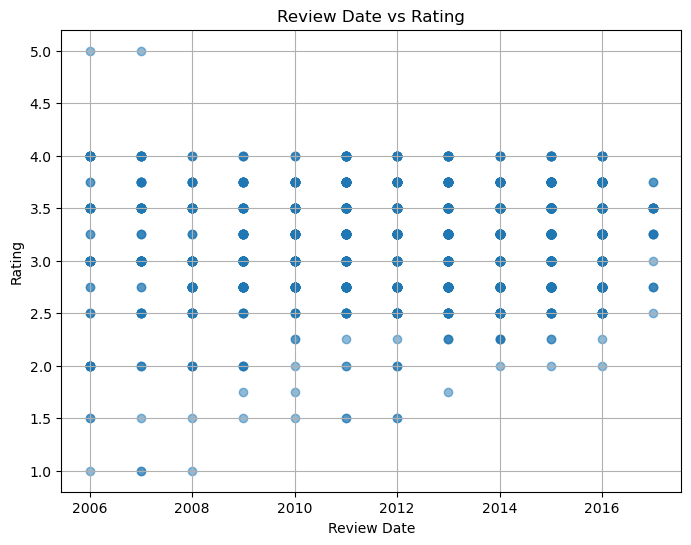

In [53]:
# Create a scatterplot for Rating vs Review Date
plt.figure(figsize=(8, 6))
plt.scatter(df_cacao['Review Date'], df_cacao['Rating'], alpha=0.5)
plt.title('Review Date vs Rating')
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

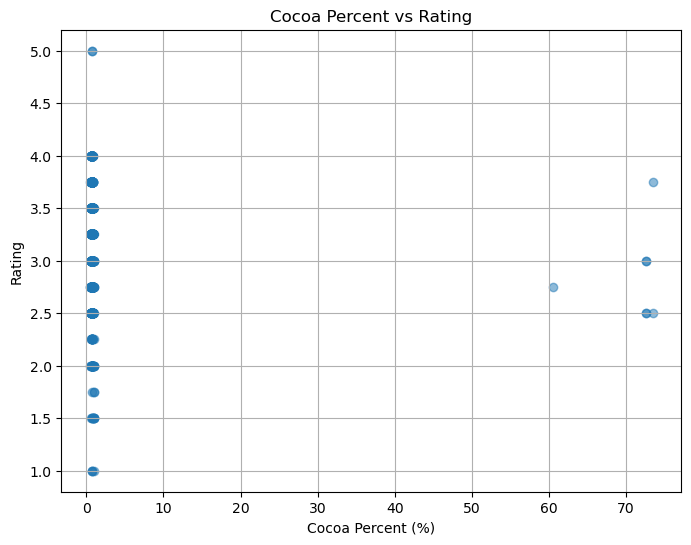

In [51]:
# Create a scatterplot for Cocoa Percent vs Rating
plt.figure(figsize=(8, 6))
plt.scatter(df_cacao['Cocoa Percent'], df_cacao['Rating'], alpha=0.5, marker='o')
plt.title('Cocoa Percent vs Rating')
plt.xlabel('Cocoa Percent (%)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


#### Hypothesis: Cocoa content does not significantly affect the rating of chocolate bars.

In [60]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df_cacao['Cocoa Percent'].values.reshape(-1, 1)  # Independent variable
y = df_cacao['Rating'].values.reshape(-1, 1)  # Dependent variable


In [62]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [64]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [66]:
# Split data into a training set and a test set

# Split data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Print the shapes to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1253, 1), (538, 1), (1253, 1), (538, 1))

#### 4. Regression analysis

In [69]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict y values for the test set
y_pred = model.predict(X_test)


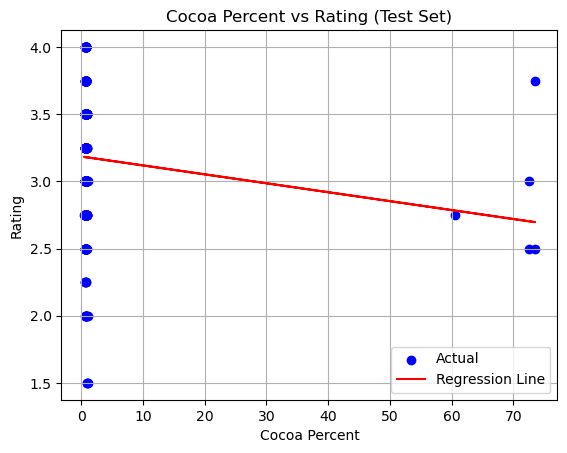

In [71]:
# Create plot that shows the regression line from the model on the test set

# Plot the actual data points from the test set
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the regression line using the predictions
plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.title('Cocoa Percent vs Rating (Test Set)')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()


**Interpretation**: The scatterplot and the regression line suggest a weak negative relationship between Cocoa Percent and Rating. As cocoa content increases, the rating appears to slightly decrease, but the trend is minimal.
The actual data points (blue) are spread out widely around the regression line (red), indicating that the model does not closely fit the data.
This visual inspection suggests that Cocoa Percent alone is not a strong predictor of Rating, and the linear model likely does not capture the variability in the data well.

In [75]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

mse, r2


(0.2072900271304238, -0.0008806602224857851)

**Note:** Both the visual analysis and the performance metrics strongly suggest that there is no significant linear relationship between Cocoa Percent and Rating. The regression model does not provide useful predictions, and other variables or factors might be more important in determining chocolate ratings. This supports the null hypothesis that Cocoa content does not significantly affect the rating of chocolate bars.

In [88]:
# Create a DataFrame to compare actual and predicted y values
comparison_df_cacao = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

# Display the comparison DataFrame
comparison_df_cacao.head(11)


,Actual,Predicted
0,3.25,3.180044
1,3.25,3.179712
2,3.00,3.179911
3,3.75,3.180044
4,2.75,3.179844
5,3.25,3.180044
6,3.50,3.179712
7,3.75,3.179911
8,2.75,3.179712
9,3.25,3.180044


**Insights:**

#### Model Fit
The scatterplot shows that the actual Rating values are widely scattered around the regression line, with no clear trend or tight fit. This visual evidence already suggests that Cocoa Percent does not strongly influence Rating.

#### Performance Metrics
The R² score* was very close to zero and even negative (-0.0009). A negative R² score indicates that the model performs worse than a simple horizontal line (which would predict the mean Rating for every value of Cocoa Percent).

The Mean Squared Error (MSE) of 0.2073 shows some error in the predictions, but the most telling metric is the R² score, which clearly demonstrates the model's inability to explain any variance in the Rating data.

#### Comparison of Actual and Predicted Values
When comparing the actual ratings with the predicted values, we can see that the predicted ratings are very close to the mean value of around 3.18, regardless of the actual rating values.

This suggests that the model is simply predicting the average Rating for almost all values of Cocoa Percent, rather than capturing any meaningful relationship between the variables.


#### Potential Bias and its Impacts:
-Uneven  Cocoa Percent Distribution: The distribution of Cocoa Percent shows a large number of entries clustered at or near 0%, with fewer entries at higher percentages. This imbalance indicates that the dataset has a much higher representation of chocolate bars with lower cocoa content, which could bias the analysis.

-Other Important Factors: The analysis only considers cocoa content, but other factors like bean origin, company reputation, or production methods could affect ratings and are not included, potentially leading to bias.

-Subjective Ratings: Chocolate ratings are subjective and based on personal preferences. This variation makes it difficult for cocoa content alone to explain differences in ratings.

-Geographical Bias: Regional preferences or the origin of the chocolate may influence ratings, and if certain regions are over-represented, it could affect the model's generalizability.tings.

variables.
